<a href="https://colab.research.google.com/github/parkminhyung/R-code-for-finance/blob/master/global%20cpi%20table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### intstall "pacman" package

In [1]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### load required packages using pacman

In [2]:
pacman::p_load("rvest","dplyr","lubridate","tibble","kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’



kableExtra installed



#### create countries list

In [3]:
North_America = c("united-states", "canada", "mexico")
Europe = c("germany", "united-kingdom", "france", "italy", "austria",
           "poland", "sweden", "switzerland")
Asia = c("china", "japan", "india", "south-korea", "indonesia",
         "turkiye")
South_America = c("brazil")
africa_countries = c("south-africa")

countries = c(North_America,Europe,Asia,South_America,africa_countries)

#### extract url from global-rate.com and rearrange url

In [4]:
url = 'https://www.global-rates.com/en/inflation/cpi/' %>%
  read_html() %>%
  html_nodes('table') %>%
  html_nodes('a') %>%
  html_attr("href") %>%
  .[sapply(.,function(x) any(sapply(countries, grepl, x)))] %>%
  unique() %>%
  paste0("https://www.global-rates.com",.)

url = url %>%
  strsplit(.,"/") %>%
  sapply(., function(x) tail(x,n=1)) %>%
  match(countries,.) %>%
  url[.]

#### Make data frame

In [5]:
data = data.frame(
  Date = as.POSIXct(paste0(format(Sys.Date(),"%Y"),"-",rep(1:12),"-01")) %>%
    format(.,"%b %y"))

#### parse cpi information from each countries and merge data frame

In [6]:
for (i in 1:length(url)) {
  try({
    df = url[i] %>%
      read_html() %>%
      html_nodes(xpath = "/html/body/div[1]/div/section[2]/div/div/div[1]/div/table") %>%
      html_table(trim = TRUE) %>% .[[1]] %>%
      subset(.,grepl("2023",Month)) %>%
      setNames(c("Date",countries[i])) %>%
      mutate(Date = Date %>%
               parse_date_time(., orders = "B Y") %>%
               format(., "%b %y")) %>%
      .[nrow(.):1,]

    data = data %>%
      left_join(df,by="Date")

  },silent = TRUE)
}

In [7]:
data

Date,united-states,canada,mexico,germany,united-kingdom,france,italy,austria,poland,sweden,switzerland,china,japan,india,south-korea,indonesia,turkiye,brazil,south-africa
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Jan 23,6.41 %,5.92 %,7.91 %,8.65 %,8.90 %,5.99 %,9.97 %,11.21 %,17.51 %,11.68 %,3.28 %,2.06 %,4.39 %,6.16 %,5.17 %,5.28 %,57.68 %,5.77 %,7.19 %
Feb 23,6.04 %,5.25 %,7.62 %,8.68 %,9.19 %,6.28 %,9.15 %,10.88 %,19.23 %,11.95 %,3.37 %,0.98 %,3.28 %,6.16 %,4.82 %,5.47 %,55.18 %,5.60 %,7.34 %
Mar 23,4.98 %,4.30 %,6.85 %,7.40 %,8.84 %,5.70 %,7.61 %,9.19 %,16.73 %,10.64 %,2.95 %,0.68 %,3.26 %,5.79 %,4.24 %,4.97 %,50.51 %,4.65 %,7.26 %
Apr 23,4.93 %,4.41 %,6.25 %,7.17 %,7.82 %,5.88 %,8.16 %,9.62 %,15.25 %,10.47 %,2.57 %,0.10 %,3.55 %,5.09 %,3.70 %,4.33 %,43.68 %,4.18 %,7.12 %
May 23,4.05 %,3.36 %,5.84 %,6.10 %,7.85 %,5.12 %,7.64 %,8.91 %,13.30 %,9.67 %,2.16 %,0.19 %,3.24 %,4.42 %,3.32 %,4.00 %,39.59 %,3.94 %,6.59 %
Jun 23,2.97 %,2.81 %,5.06 %,6.38 %,7.39 %,4.53 %,6.40 %,7.98 %,11.62 %,9.31 %,1.71 %,0.00 %,3.34 %,5.57 %,2.68 %,3.52 %,38.21 %,3.16 %,5.66 %
Jul 23,3.18 %,3.27 %,4.79 %,6.16 %,6.44 %,4.29 %,5.93 %,7.02 %,10.82 %,9.26 %,1.61 %,-0.29 %,3.32 %,7.54 %,2.26 %,3.08 %,47.83 %,3.99 %,4.81 %
Aug 23,3.67 %,4.00 %,4.64 %,6.14 %,6.24 %,4.86 %,5.44 %,7.37 %,9.95 %,7.45 %,1.55 %,0.10 %,3.12 %,6.91 %,3.42 %,3.27 %,58.94 %,4.61 %,4.80 %
Sep 23,3.70 %,NA,4.45 %,4.53 %,NA,NA,NA,NA,NA,6.48 %,1.65 %,NA,NA,NA,3.73 %,2.28 %,NA,5.19 %,NA


#### make beautiful data frame using kableExtra

In [ ]:
data = data %>%
  mutate(across(-Date,~if_else(is.na(.),"-",.))) %>%
  setNames(gsub(x=colnames(data),"-"," ") %>%
             toupper())

data %>%
  kbl(.,align = "c") %>%
  kable_paper() %>%
  add_header_above(c(" ",
                     "North America" = length(North_America),
                     "Europe" = length(Europe),
                     "Asia" = length(Asia),
                     "South America" = length(South_America),
                     "Africa" = length(africa_countries)
  ))


#### result as :

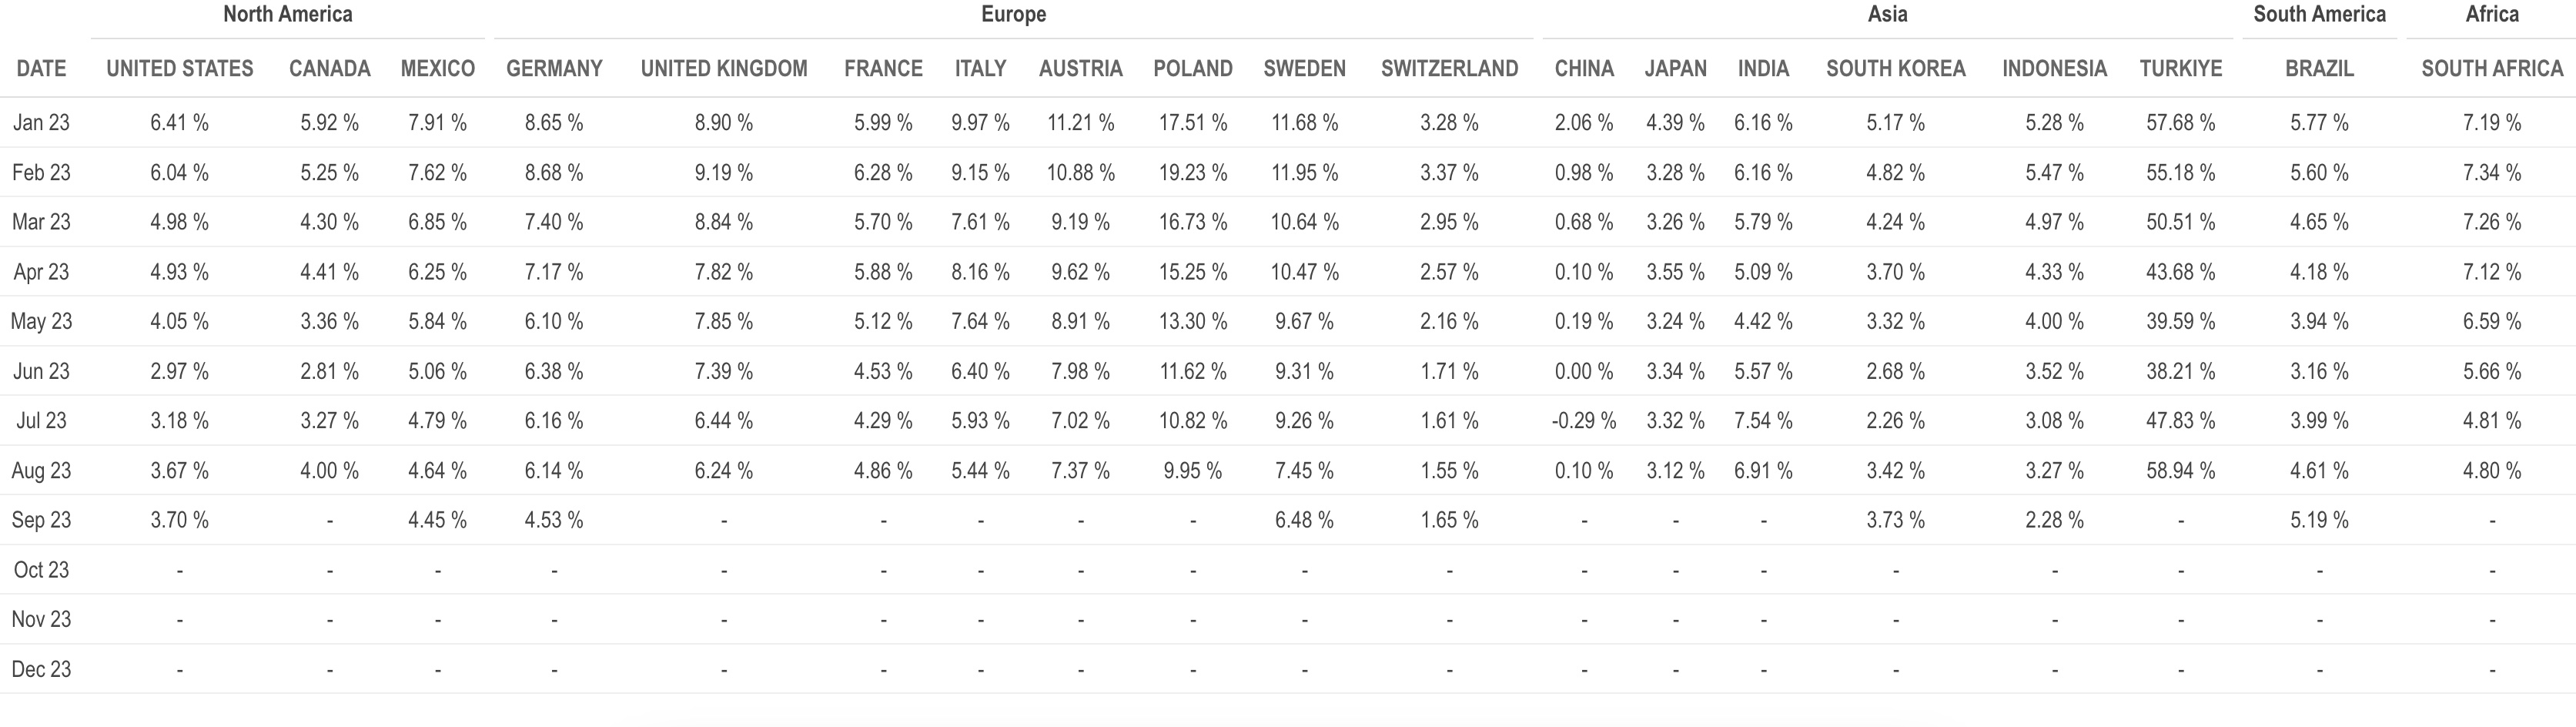